# German Credit data Exploration and Prediction

This Analysis can be divided into 6 parts:

1. Data Loading

2. Data Exploration

3. Data Preprocessing

4. Model Selection

5. Model Evaluation

6. Conclusion


We will start with Loading the required Libraries and methods

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import joblib
# magic word for producing visualizations in notebook
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def groupby_requirement(df, column, value):
    grouped_data = df.groupby([column]).get_group(value)
    length = len(grouped_data)
    return grouped_data , length

In [4]:
def age_count(df):
    young = 0
    old = 0 
    for i in df['Age']:
        if i <= 30:
            young += 1
        else:
            old += 1
    return young, old

In [5]:
def GridSCV_check(Classifier, parameters, X_train, y_train, X_test, y_test):
    #clf = RandomForestClassifier()
    #parameters = {"max_depth" : [1,10,100], 
    #              "min_samples_split" : [6, 8, 10, 12], 
    #              "min_samples_leaf" : [3,4,5]}
    clf = Classifier
    #fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta=2)
    #Grid search on the classifier
    grid_obj = GridSearchCV(clf, parameters, scoring = scorer)
    #Fit the grid search object to the training data
    grid_fit = grid_obj.fit(X_train, y_train)
    # Get the estimator
    best_clf = grid_fit.best_estimator_
    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
    return None

In [6]:
def plot_graph(C1, C2, R1, R2, I1, I2, N1, N2):
    study_dataframe = pd.DataFrame(                         
        data={N1:[C1, C2],
              N2:[R1, R2]},
        index=[I1, I2])
    study_dataframe.plot.bar(alpha=0.7)
    plt.ylabel("Total Count")
    return None

In [7]:
def encoding(column, prefix):
    labelencoder = LabelEncoder()
    customers_scaled_log_transformed[column] = labelencoder.fit_transform(
                                customers_scaled_log_transformed[column]
                                )
    encoded_label = dict(zip(labelencoder.transform(labelencoder.classes_), labelencoder.classes_ ))
    name = str('./Models/' + prefix + '_label.pkl' )
    joblib.dump(encoded_label,name)

## 1. Data Loading

First we will load the data from the german.data provided by UCI. The Column value are hardcoded as they are not present in the dataset

In [8]:
file = './data/german.data'
columns = ['Existing account', 
           'Duration month', 
           'Credit history',
           'Purpose',
           'Credit amount',
           'Saving',
           'Employment duration',
           'Installment rate',
           'Personal status',
           'Debtors',
           'Residential Duration',
           'Property',
           'Age',
           'Installment plans',
           'Housing',
           'Number of credits',
           'Job',
           'Liable People',
           'Telephone',
           'Foreign worker',
           'Classification'
          ]
customers = pd.read_csv(file, names = columns, delimiter = ' ')
customers.head()

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,...,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker,Classification
0,B11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.0
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,NaN
2,C14,12,A34,NaN,2096.0,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1.0
3,D11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1.0
4,E11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2.0


In [9]:
#Let us do some basic exploration amount the number of 
classification_count = customers.groupby('Classification').count()
classification_count['Existing account']

Classification
1.0    698
2.0    296
Name: Existing account, dtype: int64

In [10]:
#Checking if there are any missing values
customers.isnull().sum()

Existing account        2
Duration month          0
Credit history          0
Purpose                 5
Credit amount           1
Saving                  0
Employment duration     0
Installment rate        0
Personal status         1
Debtors                 0
Residential Duration    0
Property                1
Age                     0
Installment plans       1
Housing                 0
Number of credits       0
Job                     0
Liable People           0
Telephone               0
Foreign worker          0
Classification          4
dtype: int64

## 2. Data Exploration

Now we will try to do some data exploration to find meaningful information and along with that will answer the questions asked in the problem statement

### 2.1 Critical Credit History

In [11]:
# We will group Customers according to their classifications First
good_customers, good_customer_length = groupby_requirement(customers, 'Classification', 1)
bad_customers, bad_customer_length = groupby_requirement(customers, 'Classification', 2)

# Now let us try to see each group separately
good_critical_customers , good_critical_customers_length =  groupby_requirement(good_customers, 'Credit history', 'A34')
bad_critical_customers , bad_critical_customers_length= groupby_requirement(bad_customers, 'Credit history', 'A34')

# Let us try to find the percentage of Customers with Critical Credit history with 
# their respective groups
to_print_value = ((good_critical_customers_length/good_customer_length)*100)
print ('Percentage of Good customers with Critical credit History : {}'.format(to_print_value))
to_print_value = ((bad_critical_customers_length/ bad_customer_length)*100)
print ('Percentage of Bad customers with Critical credit History : {}'.format(to_print_value))

# This will print the percentage Good customers with Critical History with 
# respect to all Customers with Critical History
to_print_value =  ((good_critical_customers_length /
                   (good_critical_customers_length + bad_critical_customers_length)) * 100)
print ('Percentage of Good customers with critical credit history out of all customers '
       'with critical credit history : {}'.format(to_print_value))

Percentage of Good customers with Critical credit History : 34.620886981402
Percentage of Bad customers with Critical credit History : 16.835016835016837
Percentage of Good customers with critical credit history out of all customers with critical credit history : 82.87671232876713


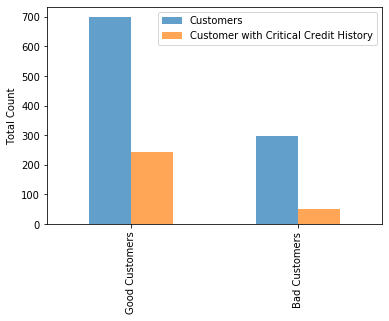

In [12]:
plot_graph(good_customer_length,
           bad_customer_length, 
           good_critical_customers_length, 
           bad_critical_customers_length,
           'Good Customers', 
           'Bad Customers',
           'Customers',
           'Customer with Critical Credit History')

#### Would a person with critical credit history, be more credit worthy?
    
>Here we can see that one of every three good customers have a Critical Credit History. On the other hand, one of every six bad customers have Critical Credit History. Also 4 out of 5 Customers with Critical Credit History are good customers. 
    
>So here we can infer that ***Yes, Critical Credit History indicates that a customer is more Credit worthy***. 

### 2.2 Age 

**Note**: Anyone below and equal to 30 years will be considered young and anyone above 30 years will be considered old

In [13]:
# Here will be categorize good customer according to the age
young_good_customers, old_good_customers = age_count(good_customers)
to_print_value = ((young_good_customers / ( young_good_customers + old_good_customers)) * 100)
print ('Percentage of good young customers out of all good customers : {}'.format(to_print_value))

# Here will be categorize bad customer according to the age
young_bad_customers , old_bad_customers = age_count(bad_customers)
to_print_value =((young_bad_customers / ( young_bad_customers + old_bad_customers)) * 100)
print ('Percentage of bad young customers out of all bad customers : {}'.format(to_print_value))

# Here try to find that what percentage of young customers are good
to_print_value = ((young_good_customers / (young_good_customers + young_bad_customers) )* 100)
print ('Percentage of good young customers out of all young customers : {}'.format(to_print_value))
# Here try to find that what percentage of old customers are good
to_print_value = ((old_good_customers / (old_good_customers + old_bad_customers) )* 100)
print ('Percentage of good old customers out of all old customers : {}'.format(to_print_value))

Percentage of good young customers out of all good customers : 37.48211731044349
Percentage of bad young customers out of all bad customers : 49.494949494949495
Percentage of good young customers out of all young customers : 64.05867970660147
Percentage of good old customers out of all old customers : 74.44633730834754


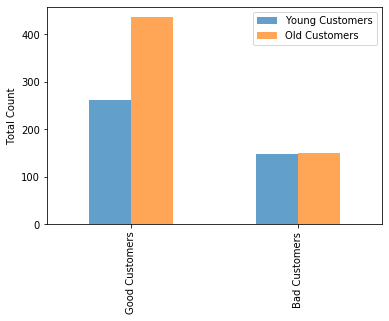

In [14]:
plot_graph(young_good_customers, 
           young_bad_customers,
           old_good_customers,
           old_bad_customers,
           'Good Customers',
           'Bad Customers',
           'Young Customers',
           'Old Customers'
           )

#### Are young people more credit worthy?
    
>Here we can see that 3 out of 4 Old Customers are Credit Worthy. On the other hand, 6 of every 10 young customers credit worthy. Also there is 50% chance that if the customer is categorised as bad customer then he/she is young. 
    
>So here we can infer that ***Old customers are more credit worthy than young people***. 

### 2.3 Credit accounts


In [15]:
# Let us see how many distinct values are present for number of Credits column
num = set(good_customers['Number of credits'])
num

{1, 2, 3, 4}

In [16]:
good_customers_with_3_credits, good_3_credit = groupby_requirement(good_customers, 'Number of credits', 3)
good_customers_with_4_credits, good_4_credit = groupby_requirement(good_customers, 'Number of credits', 4)

customers_with_3_credits, all_3_credit = groupby_requirement(customers, 'Number of credits', 3)
customers_with_4_credits, all_4_credit = groupby_requirement(customers, 'Number of credits', 4)

((good_3_credit + good_4_credit)/(all_3_credit + all_4_credit))*100
to_print_value = (((good_3_credit + good_4_credit)/(all_3_credit + all_4_credit))*100)
print ('Percentage of good customers with more than 3 credit accounts '
       'out of all customers with more that 3 credit accounts: {}'.format(to_print_value))

Percentage of good customers with more than 3 credit accounts out of all customers with more that 3 credit accounts: 76.47058823529412


#### Would a person with more credit accounts, be more credit worthy?
    
>Here we can see that 3 out of 4 good customer have more than 2 credit accounts. 
    
>So here we can infer that ***Customers with more than 2 credits accounts are credit worthy***.

### 2.4 Consolidated view of the data using Swarm graph

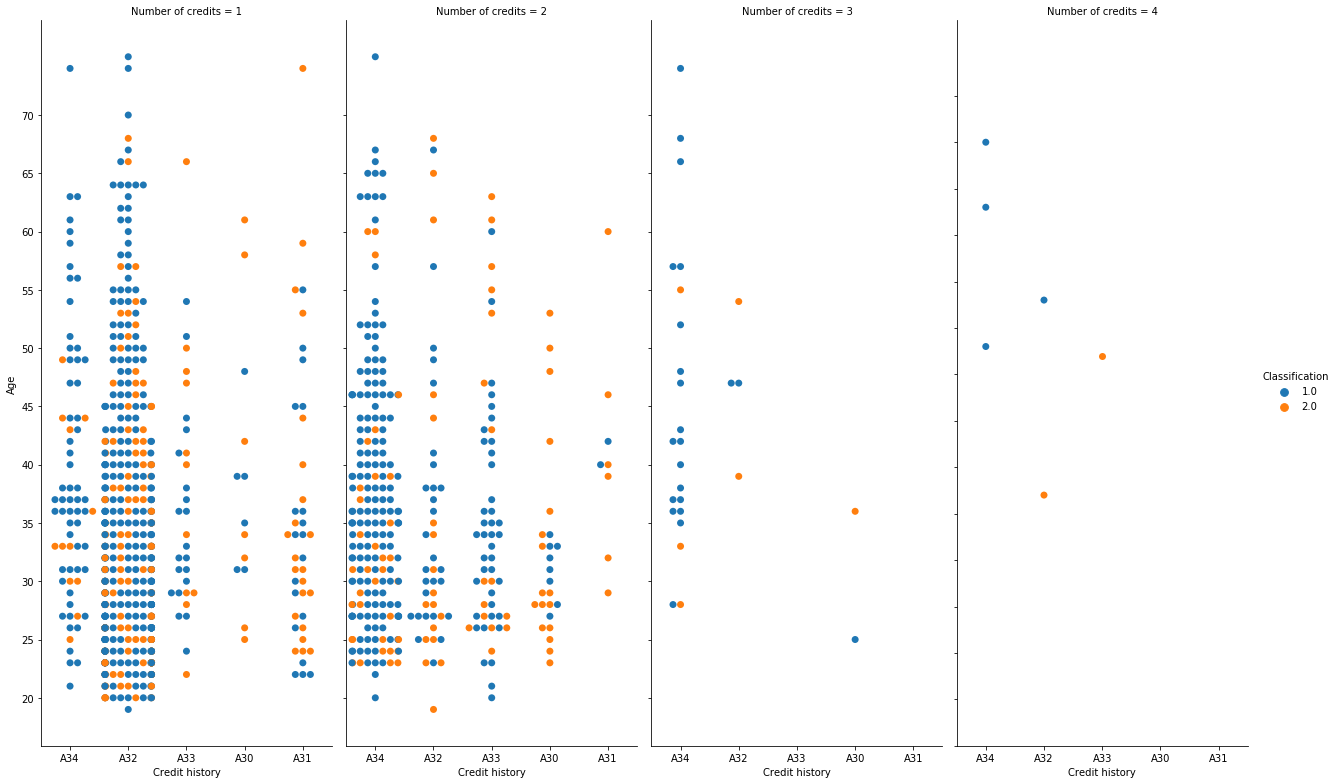

In [17]:
sns.factorplot(data=customers, 
               col='Number of credits', 
               x='Credit history', 
               y='Age', 
               hue='Classification', 
               kind='swarm', size=11, aspect=0.4, s=7)
plt.yticks(np.arange(0,75,5));

### Take away points from the graph above:
> **More the number of Credit accounts more the probabilility of Credit worthiness**

> **Critical credit History depict higher credit worthiness**

> **Anyone with two credit accounts with critical credit history(A34) and between the age 31 to 65 has high likelyhood of high credit worthiness**

## 3. Data Preprocessing 

In [18]:
#Separating Data from the Label
label = customers['Classification']
customers = customers.drop('Classification', axis = 1)
numeric_columns = customers.describe().columns

#### Now Let us plot pairplot graph to see correlation of the columns

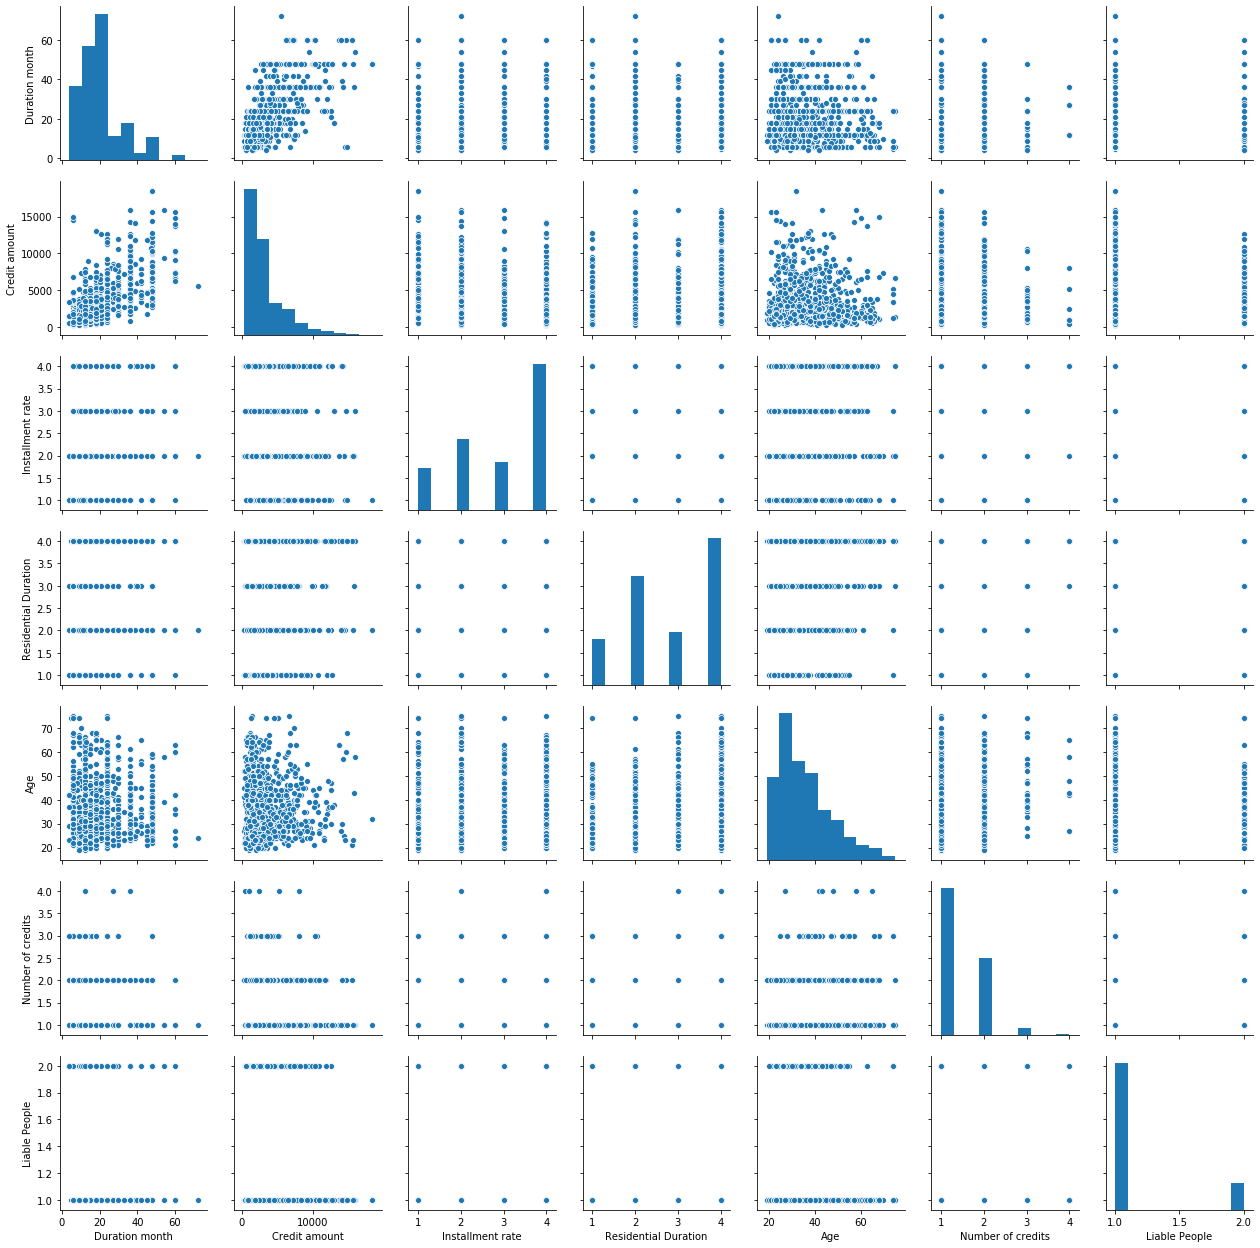

In [19]:
#Let us try to see if the columns in the dataframes are correlated
sns.pairplot(customers[numeric_columns])

#### From the Graph above we can notice a few things

> 1. Credit amount and Duration Month are directly related. So with increase of Duration month and Credit amount is also Increasing

> 2. Age along with Duration Month and Credit amount are right skewed with most of the datapoints located at the start of the graph

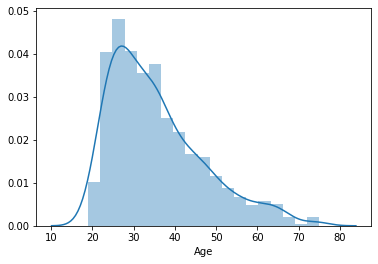

In [20]:
sns.distplot(customers['Age'])

##### The plot above is right skewed with one peak

In [24]:
#sns.distplot(customers['Credit amount'])

##### The plot above is also right skewed 

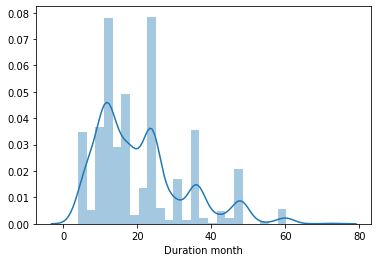

In [25]:
sns.distplot(customers['Duration month'])

##### The plot above is also right skewed with multiple peaks

### 3.1 Logarithmic Transform

> As noticed above there are columns with Skewed data. So we will preform Logarithmic transform to reduce the impact of very large or very small values on the learning Algorithm

In [26]:
# Here we will perform Log transform of all the numeric columns of create a redistributed graph
customers_log_transformed = customers.copy()
customers_log_transformed[numeric_columns] = customers[numeric_columns].apply(lambda x: np.log(x + 1))
customers_log_transformed

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,Residential Duration,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker
0,B11,1.945910,A34,A43,7.064759,A65,A75,1.609438,A93,A101,1.609438,A121,4.219508,A143,A152,1.098612,A173,0.693147,A192,A201
1,A12,3.891820,A32,A43,8.691483,A61,A73,1.098612,A92,A101,1.098612,A121,3.135494,A143,A152,0.693147,A173,0.693147,A191,A201
2,C14,2.564949,A34,NaN,7.648263,A61,A74,1.098612,A93,A101,1.386294,A121,3.912023,A143,A152,0.693147,A172,1.098612,A191,A201
3,D11,3.761200,A32,A42,8.972464,A61,A74,1.098612,A93,A103,1.609438,A122,3.828641,A143,A153,0.693147,A173,1.098612,A191,A201
4,E11,3.218876,A33,A40,8.491055,A61,A73,1.386294,A93,A101,1.609438,A124,3.988984,A143,A153,1.098612,A173,1.098612,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,2.564949,A32,A42,7.459915,A61,A74,1.386294,A92,A101,1.609438,A121,3.465736,A143,A152,0.693147,A172,0.693147,A191,A201
996,A11,3.433987,A32,A41,8.257904,A61,A73,1.609438,A91,A101,1.609438,A122,3.713572,A143,A152,0.693147,A174,0.693147,A192,A201
997,A14,2.564949,A32,A43,6.690842,A61,A75,1.609438,A93,A101,1.609438,A123,3.663562,A143,A152,0.693147,A173,0.693147,A191,A201
998,A11,3.828641,A32,A43,7.520776,A61,A73,1.609438,A93,A101,1.609438,A124,3.178054,A143,A153,0.693147,A173,0.693147,A192,A201


##### Now let us Pairplot again to check if the distribution has been normalized

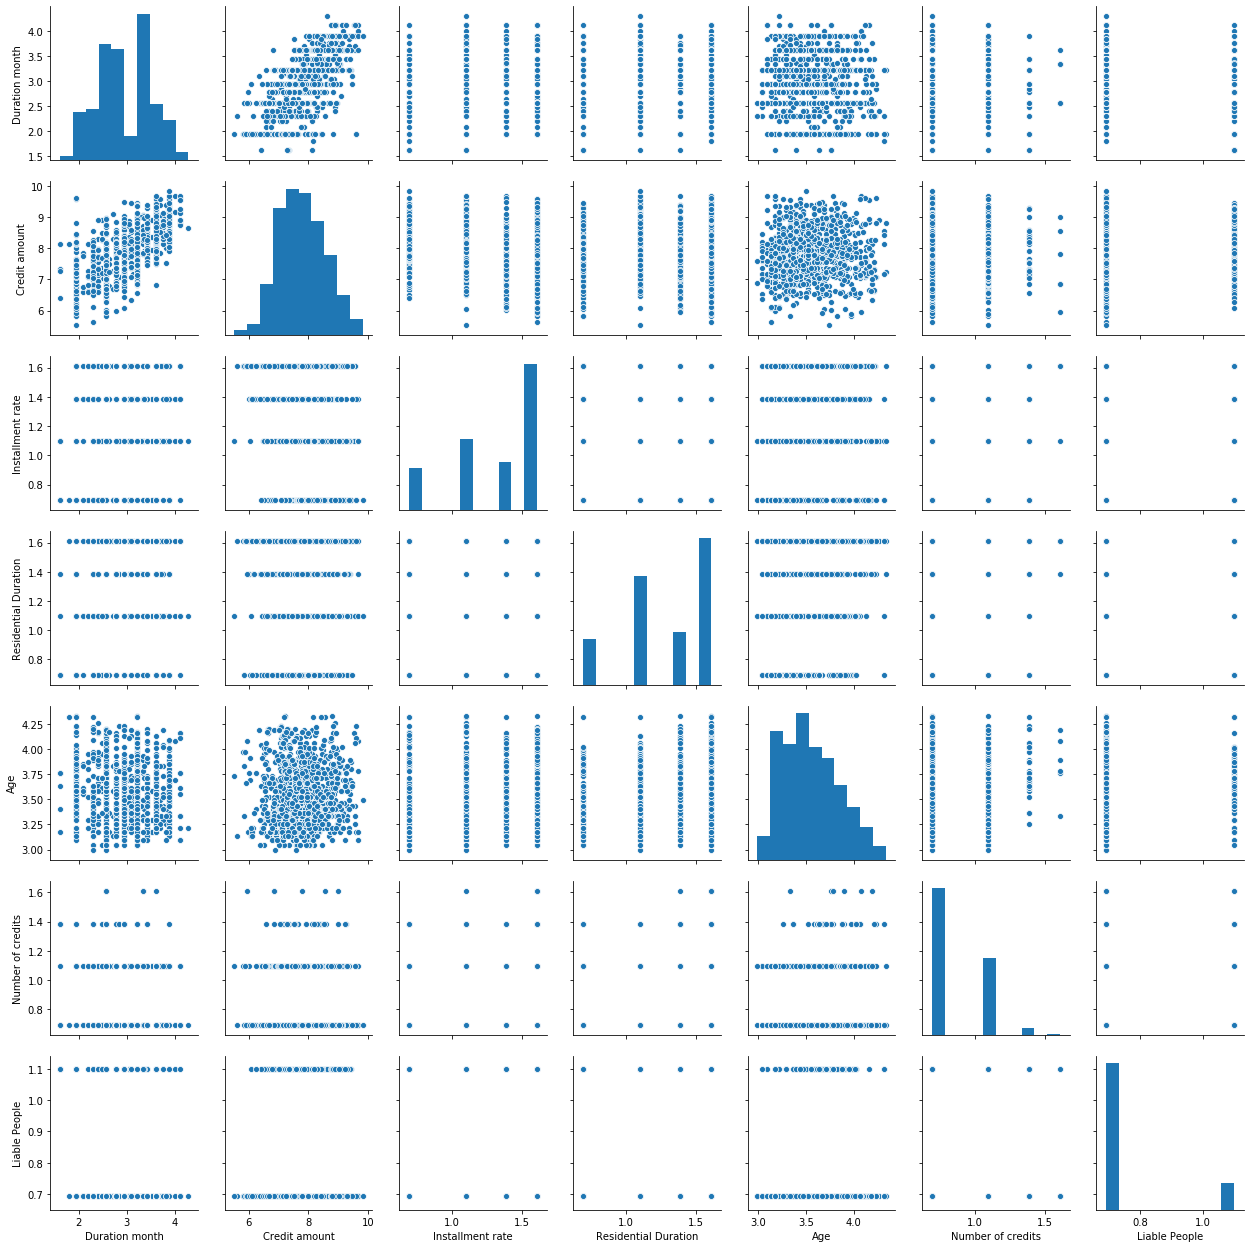

In [27]:
sns.pairplot(customers_log_transformed[numeric_columns])

### 3.2 Min Max Scaling

> As there are numeric values present in the data we will perform Min Max Scaling to normalize the data. There is another way of doing this know as **Standard Scaling** which uses Mean and Standard deviation to produce the normalized data

In [28]:
scaler = MinMaxScaler()
customers_scaled_log_transformed = customers_log_transformed.copy()
customers_scaled_log_transformed[numeric_columns] = scaler.fit_transform(customers_scaled_log_transformed[numeric_columns])
customers_scaled_log_transformed

,Existing account,Duration month,Credit history,Purpose,Credit amount,Saving,Employment duration,Installment rate,Personal status,Debtors,Residential Duration,Property,Age,Installment plans,Housing,Number of credits,Job,Liable People,Telephone,Foreign worker
0,B11,0.125502,A34,A43,0.358311,A65,A75,1.000000,A93,A101,1.000000,A121,0.916685,A143,A152,0.442507,A173,0.0,A192,A201
1,A12,0.851311,A32,A43,0.736970,A61,A73,0.442507,A92,A101,0.442507,A121,0.104691,A143,A152,0.000000,A173,0.0,A191,A201
2,C14,0.356398,A34,NaN,0.494135,A61,A74,0.442507,A93,A101,0.756471,A121,0.686360,A143,A152,0.000000,A172,1.0,A191,A201
3,D11,0.802590,A32,A42,0.802375,A61,A74,0.442507,A93,A103,1.000000,A122,0.623901,A143,A153,0.000000,A173,1.0,A191,A201
4,E11,0.600308,A33,A40,0.690315,A61,A73,0.756471,A93,A101,1.000000,A124,0.744008,A143,A153,0.442507,A173,1.0,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,0.356398,A32,A42,0.450293,A61,A74,0.756471,A92,A101,1.000000,A121,0.352062,A143,A152,0.000000,A172,0.0,A191,A201
996,A11,0.680543,A32,A41,0.636044,A61,A73,1.000000,A91,A101,1.000000,A122,0.537707,A143,A152,0.000000,A174,0.0,A192,A201
997,A14,0.356398,A32,A43,0.271272,A61,A75,1.000000,A93,A101,1.000000,A123,0.500246,A143,A152,0.000000,A173,0.0,A191,A201
998,A11,0.827745,A32,A43,0.464460,A61,A73,1.000000,A93,A101,1.000000,A124,0.136570,A143,A153,0.000000,A173,0.0,A192,A201


### 3.3 One-Hot Encoding Data

> As there are a lot of non Numeric (categorical) columns. We will preform **LabelEncoding** to convert Categorical column into machine readable data

In [29]:
encoding('Existing account', 'ea')
encoding('Credit history', 'ch')
encoding('Purpose', 'pr')
encoding('Saving', 'sa')
encoding('Employment duration', 'ed')
encoding('Personal status', 'ps')
encoding('Debtors', 'db')
encoding('Property', 'pt')
encoding('Installment plans', 'ip')
encoding('Housing', 'ho')
encoding('Job', 'jb')
encoding('Telephone', 'tp')
encoding('Foreign worker', 'fw')

TypeError: argument must be a string or number

In [ ]:
customers_final = customers_scaled_log_transformed.copy()
customers_final

In [ ]:
customers_final.to_csv('./data/clean_customer_data.csv')

### 3.4 Splitting the data into Test and Train datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(customers_final, 
                                                    label, 
                                                    test_size = 0.25, 
                                                    random_state = 1)

## 4. Model Selection 

### Here we will select 3 models and then will try to find the best model to implement

From all the available supervised learning models we have chosen only 3 : 

1. Random Forest Classifier

2. Logistic Regression

3. Support Vector machines

### 4.1 Random Forest Classifier

In [ ]:
# Declaring the Classifier
Randon_forest_clf = RandomForestClassifier()

# Fit the Classifier object on Input data
Random_forest_model = Randon_forest_clf.fit(X_train, y_train)

# Predict the Values on test data
Randon_forest_pred = Random_forest_model.predict(X_test)

# Calculate the Probalities for each Prediction
Randon_forest_proba = Random_forest_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
Random_forest_accuracy = accuracy_score(y_test, Randon_forest_pred) 

### 4.2 Logistic Regression Classifier

In [ ]:
# Declaring the Classifier
Logistic_regression_clf = LogisticRegression()

# Fit the Classifier object on Input data
Logistic_regression_model = Logistic_regression_clf.fit(X_train, y_train)

# Predict the Values on test data
Logistic_regression_pred = Logistic_regression_model.predict(X_test)

# Calculate the Probalities for each Prediction
Logistic_regression_proba = Logistic_regression_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
Logistic_regression_accuracy = accuracy_score(y_test, Logistic_regression_pred)

### 4.3 Support Vector Machine Classifier

In [22]:
# Declaring the Classifier
SVC_clf = SVC(kernel = 'linear',probability = True)

# Fit the Classifier object on Input data
SVC_model = SVC_clf.fit(X_train, y_train)

# Predict the Values on test data
SVC_pred = SVC_model.predict(X_test)

# Calculate the Probalities for each Prediction
SVC_proba = SVC_model.predict_proba(X_test)

# Calculate the accuracy of the Classifier
SVC_accuracy = accuracy_score(y_test, SVC_pred) 

NameError: name 'X_train' is not defined

In [23]:
print('Accuracy of Random Forest Classifier is {}'.format(Random_forest_accuracy))
print('Accuracy of Logistic Regression Classifier is {}'.format(Logistic_regression_accuracy))
print('Accuracy of Support Vector Machine Classifier is {}'.format(SVC_accuracy))

NameError: name 'Random_forest_accuracy' is not defined

> One thing to keep in our minds is to decide which Matrics to use here.
> The output here uses a Cost matrix where penalty to have a **False Negative is higher than that of False Positive**. This means that for a bank **the cost to loan a misclassified bad customer is higher than the cost of loan rejected for a good customer**. Therefore we will try to **Reduce** the False Negatives. This actually means we will have to have a **large Recall so that False Negatives are minimized**. 

> Cost Matrix

|        | Good   | Bad  |
| :---   | :----: | ---: |
| Good   | 0      | 1    |
| Bad    | 5      | 0    |

    (1 = Good,  2 = Bad)
    The rows represent the actual classification and the columns the predicted classification.

> So to evaluate the models to have large recall we will use Fbeta Score. Formula for Fbeta Score is 
((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall). Here when the value of beta is greater that '1' , it will weight more attention on Recall than Precision. Therefore we will use beta as '2'.

In [33]:
#Now Calculating Fbeta Score 
Random_forest_fbeta = fbeta_score(y_test, Randon_forest_pred, beta = 2)
Logistic_regression_fbeta = fbeta_score(y_test, Logistic_regression_pred, beta = 2)
SVC_fbeta = fbeta_score(y_test, SVC_pred, beta = 2)

In [34]:
print('Fbeta Score of Random Forest Classifier is {}'.format(Random_forest_fbeta))
print('Fbeta Score of Logistic Regression Classifier is {}'.format(Logistic_regression_fbeta))
print('Fbeta Score of Support Vector Machine Classifier is {}'.format(SVC_fbeta))

Fbeta Score of Random Forest Classifier is 0.8700440528634361
Fbeta Score of Logistic Regression Classifier is 0.8985667034178613
Fbeta Score of Support Vector Machine Classifier is 0.8991228070175437


## 5. Model Evaluation

### 5.1 ROC Curve

> We can see here that the Fbeta score Random Forest has is better than the other two. While the  Accuracy of Logistic Regression is better. So we will Drop SVM algorithm and try to find the best from Random Forest and Logistic Regression. 

> To do that we will plot the **ROC curve** to see which one is consistant

0.795838452088452
0.7930743243243243


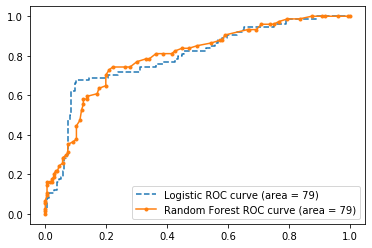

In [35]:
rf_probs = Randon_forest_proba[:,1]
lr_probs = Logistic_regression_proba[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label=2)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=2)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_label = str('Logistic ROC curve (area = {})'.format(int(lr_auc*100)))
rf_label = str('Random Forest ROC curve (area = {})'.format(int(rf_auc*100)))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label=lr_label)
plt.plot(rf_fpr, rf_tpr, marker='.', label=rf_label)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print (rf_auc)
print (lr_auc)
plt.legend()
plt.show()

### 5.2 GridSearchCV

> We can see Random Forest is consistant. To verify further we will use **GridSearchCV** to predict the credit worthiness using the combination of best hyperparameters for both the Classifiers.

In [36]:
#Grid Search for Random Forest Classifier

Classifier = RandomForestClassifier()
parameters = {"max_depth" : [1,10,100], 
              "min_samples_split" : [6, 8, 10, 12], 
              "min_samples_leaf" : [3,4,5]}

GridSCV_check(Classifier, parameters, X_train, y_train, X_test, y_test)

Unoptimized model
------
Accuracy score on testing data: 0.7360
F-score on testing data: 0.8681

Optimized Model
------
Final accuracy score on the testing data: 0.7040
Final F-score on the testing data: 0.9224


In [37]:
#Grid Search for Logistic Regression
Classifier = LogisticRegression()
parameters = {"C" : [0.01,0.1, 1,10,100], 
              "penalty" : ['l1', 'l2'], 
              "class_weight":['balanced']}
GridSCV_check(Classifier, parameters, X_train, y_train, X_test, y_test)

Unoptimized model
------
Accuracy score on testing data: 0.7880
F-score on testing data: 0.8986

Optimized Model
------
Final accuracy score on the testing data: 0.7440
Final F-score on the testing data: 0.7710


> From the evaluation above we can see that both the optimized models have equal evaluation matrics. Final accuracy score for both the models was 0.71 and Fbeta score was 0.92. But as we have see that even without optimization, Fbeta score of Random forest is better and therefore we will be choose ***Random forest*** for this dataset prediction

In [38]:
joblib.dump(Random_forest_model,'Selected_Model.pkl')

['Selected_Model.pkl']